In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
file_path = r'C:\Users\adika\Documents\DeathCause.csv'
data = pd.read_csv(file_path, delimiter=';')

In [65]:
data

,Country_Terrain,Acute_hepatitis,Alcohol_use_disorders,Alzheimers_dementias,Cardiovascular_diseases,Conflict_terrorismum,Diabetes,Diarrheal_diseases,Digestive_diseases,Drowning,...,Maternal_disorders,Malaria,HIV_AIDS,Drug_use_disorders,Environmental_heat_and_cold_exposure,Exposure_of_nature,Lower_respiratory_infectionses,liver_diseases,kidney_disease,Interpersonal_violence
0,Afghanistan,98108,3257,41998,1607042,280520,93207,245832,186959,56536,...,129621,13924,4282,7094,2187,16770,822179,98419,134676,108228
1,African Region (WHO),525499,163833,1252189,24875081,1402850,3602991,24485553,7763233,801804,...,2740727,21462693,28888674,53177,152369,27009,23007934,4578870,2779058,2056987
2,Albania,44,458,16549,270603,2145,4055,677,14907,2397,...,246,0,57,634,164,89,26402,8717,7636,5242
3,Algeria,10492,2748,86914,2123720,30947,89035,34410,146527,24273,...,29475,70,6101,10612,1041,4032,179379,91927,154666,16702
4,American Samoa,0,17,143,2851,10,970,89,341,120,...,30,0,15,0,25,41,328,181,512,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Wales,30,2082,40586,372604,37,10810,2008,43828,529,...,84,0,503,3211,326,71,68744,13347,9440,739
217,World (excluding China),31584,1095620,13434010,100146131,31967,6563100,628785,12982106,649623,...,57512,1311,887898,1176353,198247,55940,10755075,6337034,6478820,1014677
218,Yemen,26532,1590,31045,1110837,95610,30812,419051,111536,27994,...,53611,143463,6276,3718,1049,1131,259044,64136,52119,17918
219,Zambia,8846,2677,13473,360770,159,54098,348764,147640,12809,...,28395,205529,1175563,933,2451,73,345855,100581,41751,30065


In [61]:
data.columns = data.columns.str.replace(' ', '_').str.replace("'", "").str.replace('(', '').str.replace(')', '').str.replace('/', '_')

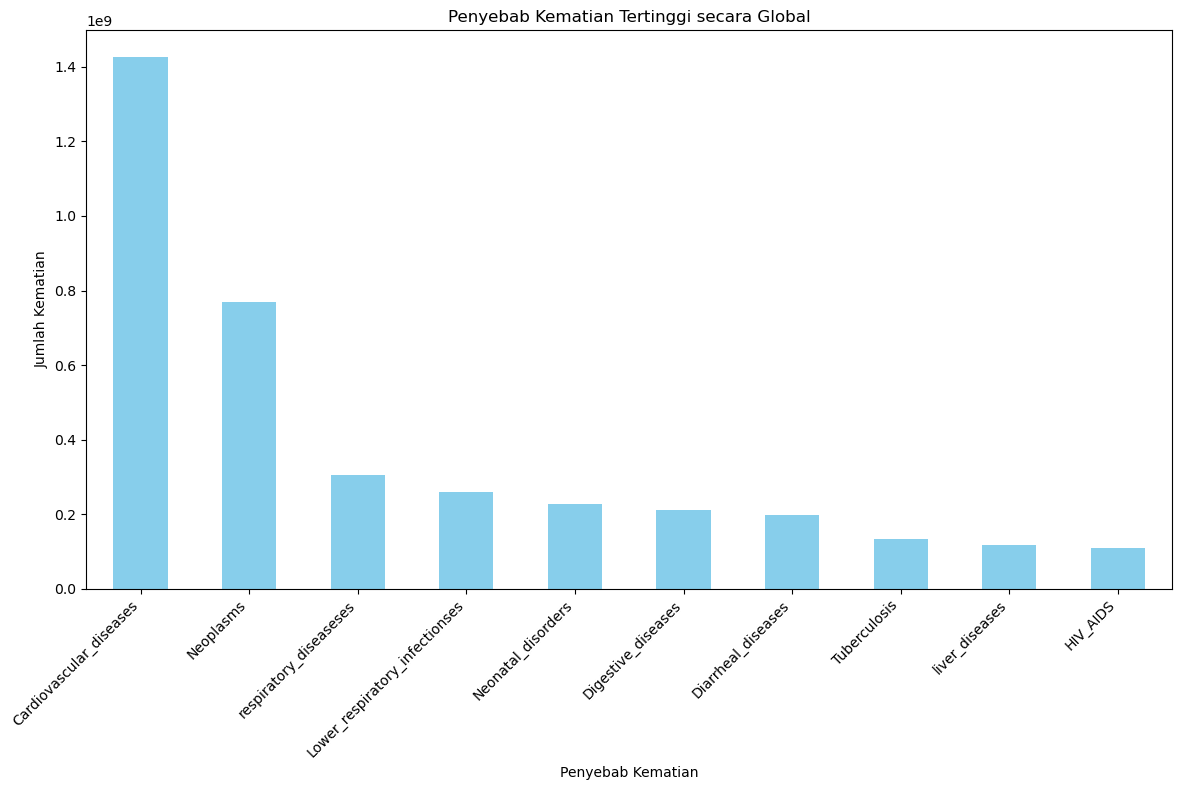

In [69]:
# Calculate total deaths for each cause across all countries/regions
total_deaths = data.drop(columns='Country_Terrain').sum().sort_values(ascending=False)

# Get the top causes of death
top_causes = total_deaths.head(10)

# Plot the top causes of death
plt.figure(figsize=(12, 8))
top_causes.plot(kind='bar', color='skyblue')
plt.title('Penyebab Kematian Tertinggi secara Global')
plt.xlabel('Penyebab Kematian')
plt.ylabel('Jumlah Kematian')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [73]:
print(data.columns)

Index(['Country_Terrain', 'Acute_hepatitis', 'Alcohol_use_disorders',
       'Alzheimers_dementias', 'Cardiovascular_diseases',
       'Conflict_terrorismum', 'Diabetes', 'Diarrheal_diseases',
       'Digestive_diseases', 'Drowning', 'Tuberculosis', 'Terrorism_deaths',
       'Self-harm', 'respiratory_diseaseses', 'Protein-energy_malnutrition',
       'Road_injuries', 'Poisonings', 'Parkinson', 'Nutritional_deficiencies',
       'Neonatal_disorders', 'Fire_hot_substances', 'Neoplasms', 'Meningitis',
       'Maternal_disorders', 'Malaria', 'HIV_AIDS', 'Drug_use_disorders',
       'Environmental_heat_and_cold_exposure', 'Exposure_of_nature',
       'Lower_respiratory_infectionses', 'liver_diseases', 'kidney_disease',
       'Interpersonal_violence'],
      dtype='object')


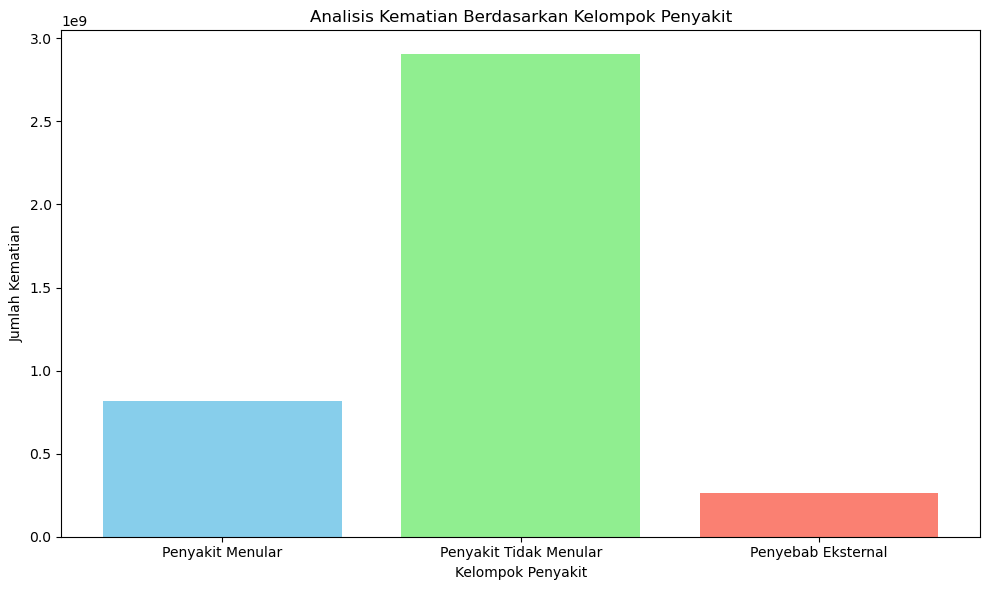

In [75]:
# Define disease categories (correct any discrepancies found in column names)
infectious_diseases = ['Acute_hepatitis', 'Diarrheal_diseases', 'Lower_respiratory_infectionses', 'Malaria', 'Meningitis', 'Tuberculosis', 'HIV_AIDS']
non_infectious_diseases = ['Alzheimers_dementias', 'Cardiovascular_diseases', 'Diabetes', 'Digestive_diseases', 'Neoplasms', 'Lower_respiratory_infectionses', 'Parkinson']
external_causes = ['Road_injuries', 'Drowning', 'Self-harm', 'Interpersonal_violence', 'Poisonings', 'Exposure_of_nature']

# Calculate total deaths for each category
total_infectious = data[infectious_diseases].sum().sum()
total_non_infectious = data[non_infectious_diseases].sum().sum()
total_external = data[external_causes].sum().sum()

# Create a DataFrame for plotting
categories = ['Penyakit Menular', 'Penyakit Tidak Menular', 'Penyebab Eksternal']
total_deaths = [total_infectious, total_non_infectious, total_external]
df = pd.DataFrame({'Kategori': categories, 'Jumlah Kematian': total_deaths})

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['Kategori'], df['Jumlah Kematian'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Analisis Kematian Berdasarkan Kelompok Penyakit')
plt.xlabel('Kelompok Penyakit')
plt.ylabel('Jumlah Kematian')
plt.tight_layout()

# Show the plot
plt.show()

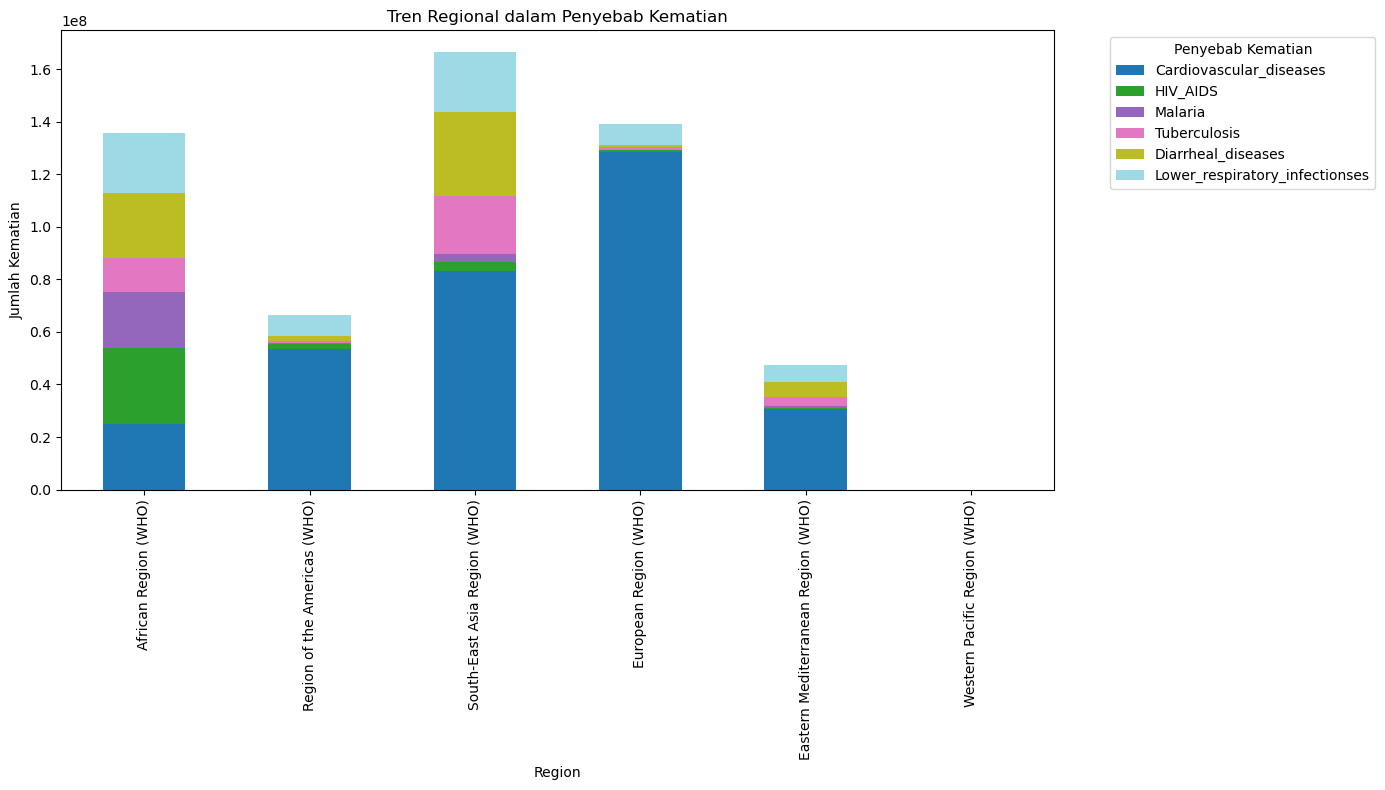

In [77]:
# Define regions
regions = ['African Region (WHO)', 'Region of the Americas (WHO)', 'South-East Asia Region (WHO)', 'European Region (WHO)', 'Eastern Mediterranean Region (WHO)', 'Western Pacific Region (WHO)']

# Define a few major causes of death for analysis
major_causes = ['Cardiovascular_diseases', 'HIV_AIDS', 'Malaria', 'Tuberculosis', 'Diarrheal_diseases', 'Lower_respiratory_infectionses']

# Initialize a dictionary to store the data
regional_data = {region: data[data['Country_Terrain'] == region][major_causes].sum() for region in regions}

# Convert the dictionary to a DataFrame for plotting
regional_df = pd.DataFrame(regional_data).T

# Plot the data
regional_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Tren Regional dalam Penyebab Kematian')
plt.xlabel('Region')
plt.ylabel('Jumlah Kematian')
plt.legend(title='Penyebab Kematian', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

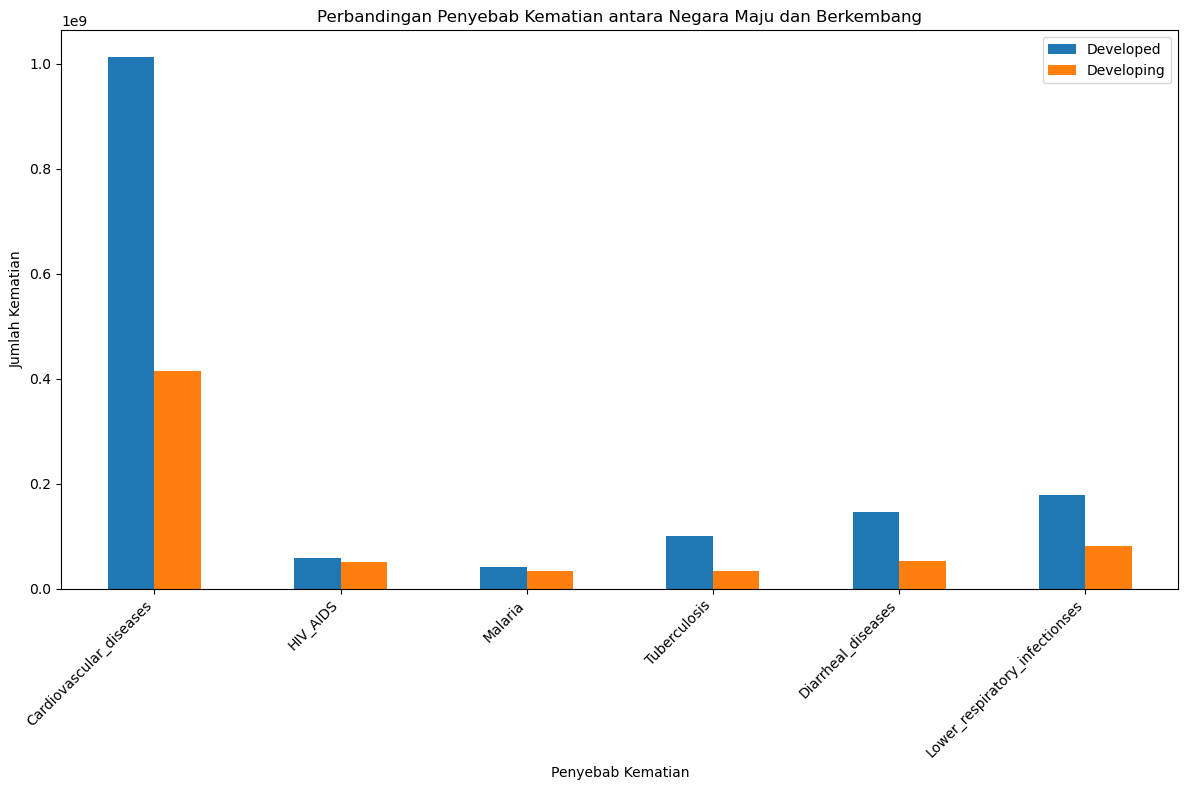

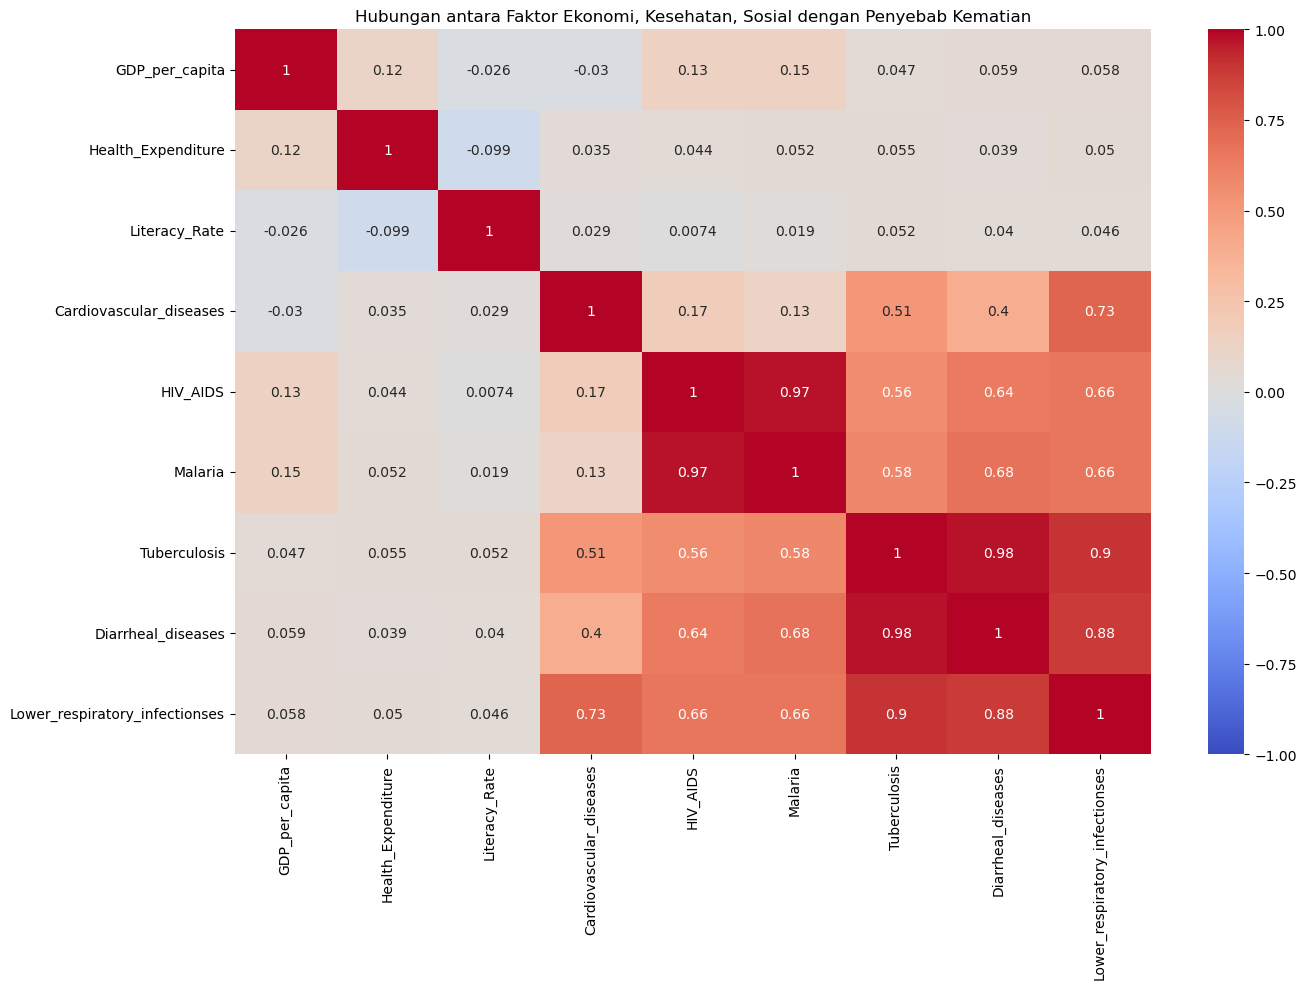

In [81]:
np.random.seed(42)
data['Development_Status'] = np.random.choice(['Developed', 'Developing'], size=len(data))
data['GDP_per_capita'] = np.random.uniform(1000, 50000, size=len(data))
data['Health_Expenditure'] = np.random.uniform(2, 15, size=len(data))
data['Literacy_Rate'] = np.random.uniform(50, 100, size=len(data))

# Define a few major causes of death for analysis
major_causes = ['Cardiovascular_diseases', 'HIV_AIDS', 'Malaria', 'Tuberculosis', 'Diarrheal_diseases', 'Lower_respiratory_infectionses']

# Comparison of death causes between developed and developing countries
developed_data = data[data['Development_Status'] == 'Developed'][major_causes].sum()
developing_data = data[data['Development_Status'] == 'Developing'][major_causes].sum()

comparison_df = pd.DataFrame({
    'Developed': developed_data,
    'Developing': developing_data
})

# Plot the comparison
comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Perbandingan Penyebab Kematian antara Negara Maju dan Berkembang')
plt.xlabel('Penyebab Kematian')
plt.ylabel('Jumlah Kematian')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analysis of the relationship between economic, health, social factors and causes of death
# Correlation matrix
factors = ['GDP_per_capita', 'Health_Expenditure', 'Literacy_Rate']
correlation_data = data[factors + major_causes].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Hubungan antara Faktor Ekonomi, Kesehatan, Sosial dengan Penyebab Kematian')
plt.tight_layout()
plt.show()